<a href="https://colab.research.google.com/github/JihyoGwon/PythonforDataAnalysis/blob/master/001_1_Kaggle_Titanic_Colab_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. 시작하기

### 0.1 References

*   [(Titanic)타이타닉 생존자 예측(1)](https://shinejay.tistory.com/4)
*   [L1_판다스 기초: import/파일불러오기/데이터탐색](https://m.blog.naver.com/PostView.naver?blogId=rainforest_en&logNo=222445251461&isFromSearchAddView=true)
*   [Titanic Data Science Solutions](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)

#1. 라이브러리


### 1.0 References
*   [Colab에서 라이브러리 추가](https://noapps-code.tistory.com/202)

###1.1 Required Libraries

*   numpy
*   pandas
*   matplotlib
*   seaborn

### 1.2 라이브러리 설치

In [11]:
import os, sys

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


###1.3 라이브러리 호출

In [17]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileExistsError: ignored

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
#노트북 내부에 그림을 표시하도록 지정
%matplotlib inline 

In [20]:
# 구글드라이브에 저장
from google.colab import drive
drive.mount('/gdrive/', force_remount=True)

import warnings
warnings.filterwarnings('ignore')

Mounted at /gdrive/


# 2. 데이터 탐색

###2.0 불러오기

In [21]:
path = '/gdrive/My Drive/DataAnalysis/PythonforDataAnalysis/Kaggle-Data/titanic'

train = pd.read_csv(path+'/train.csv')
test = pd.read_csv(path+'/test.csv')
gender_submission = pd.read_csv(path+'/gender_submission.csv')

###2.1 데이터 info

In [ ]:
train.info()
test.info()
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  



변수설명
*   PassengerId : 각 승객의 고유 번호

*   Survived : 생존 여부(종속 변수)  
0 = 사망
1 = 생존
*   Pclass : 객실 등급 - 승객의 사회적, 경제적 지위  
1st = Upper
2nd = Middle
3rd = Lower
*   Name : 이름

*   Sex : 성별

*   Age : 나이

*   SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

*   Parch : 동반한 Parent(부모) Child(자식)의 수

*   Ticket : 티켓의 고유넘버

*   Fare : 티켓의 요금

*   Cabin : 객실 번호

*   Embarked : 승선한 항  
C = Cherbourg
Q = Queenstown
S = Southampton


### 2.2 데이터 프레임

#### 2.2.1 상위 3개 데이터

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20세 미만
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30세 미만
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20세 미만


#### 2.2.2 샘플 수와 컬럼 수

In [ ]:
print(train.shape)

(891, 13)


#### 2.2.3 특정 열 불러오기

In [ ]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
train[['Survived','Pclass']]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


#### 2.2.4 특정 행 불러오기

In [ ]:
train.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Age_group                       20세 미만
Name: 0, dtype: object

In [ ]:
train.loc[[10,11]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.70,G6,S,0세 미만
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,C103,S,50세 미만


#### 2.2.5 조건에 맞는 샘플 가져오기

##### 예시1: 생존한 사람의 데이터만 가져오기

*   step1. 조건 설정

In [ ]:
cond = (train['Survived'] == 1)

*   step2. 조건에 맞는 데이터 불러오기



In [ ]:
train[cond]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30세 미만
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20세 미만
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30세 미만
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20세 미만
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10세 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,10세 미만
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,50세 미만
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,20세 미만
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10세 미만


##### 예시2: Age와 Name 열만 출력, Age가 60세 이상, 상위 3개만 출력하는 코드 만들기



*   step1. 조건 설정



*   step2. 조건에 맞는 데이터 불러오기

In [ ]:
a = train[cond]



*   step3. age, name만 & 상위 3개 출력


In [ ]:
a[['Age', 'Name']].head(3)

,Age,Name
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"


##### 예시3: Age는 60세 이상, Plcass가 1등급, Sex가 female인 데이터만 가져오는 방법



*   step1. 조건설정


In [ ]:
cond_age = (train['Age'] >= 60)
cond_pclass = (train['Pclass'] == 1)
cond_sex = (train['Sex'] == 'female')



*   step2. 조건에 맞는 데이터 불러오기



In [ ]:
train[cond_age & cond_pclass & cond_sex]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,60세 미만
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,60세 미만
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,60세 미만


##### 예시4: Age는 60세 이상이거나  Plcass가 1등급이거나 Sex가 female인 데이터만 가져오는 방법



*   step2. 조건에 맞는 데이터 불러오기



In [ ]:
train[cond_age | cond_pclass | cond_sex]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30세 미만
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20세 미만
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30세 미만
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50세 미만
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20세 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,20세 미만
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,30세 미만
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10세 미만
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


#3. 기초 통계량

### 3.0 숫자형 데이터

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3.1 문자형 데이터

In [ ]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 3.2 문자형을 숫자형으로 수정

In [ ]:
train['Sex_clean'] = train['Sex'].astype('category').cat.codes
test['Sex_Clean'] = test['Sex'].astype('category').cat.codes

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# 4. Analyze by pivoting features
[Titanic Data Science Solutions](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)

### 4.0 Pclass*Survived

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### 4.1 Sex*Survived

In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### 4.2 Age*Survived

#### 4.2.2 Age*Survived 2

In [ ]:
bins2 = list(range(0,81,20))
bins2_label = [str(x)+"세 이상" for x in bins2]
train['Age_group2'] = pd.cut(train['Age'], bins2, right=False, labels=bins2_label[:-1])
train[train['Age']>60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Age_group2
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,60세 이상,60세 이상
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,60세 이상,60세 이상
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,70세 이상,60세 이상
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,70세 이상,60세 이상
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,60세 이상,60세 이상
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,60세 이상,60세 이상
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,60세 이상,60세 이상
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,60세 이상,60세 이상
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,60세 이상,60세 이상
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,60세 이상,60세 이상


In [ ]:
train[["Age_group2", "Survived"]].groupby(['Age_group2'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_group2,Survived
0,0세 이상,0.481707
2,40세 이상,0.394161
1,20세 이상,0.387597
3,60세 이상,0.240000


#### 4.2.1 Age*Survived

In [ ]:
maxAge = max(train['Age'])
print(maxAge)

minAge = min(train['Age'])
print(minAge)

80.0
0.42


In [ ]:
bins = list(range(0,81,10))
bins

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [ ]:
bins_label = [str(x)+"세 이상" for x in bins]
bins_label

['0세 이상',
 '10세 이상',
 '20세 이상',
 '30세 이상',
 '40세 이상',
 '50세 이상',
 '60세 이상',
 '70세 이상',
 '80세 이상']

In [ ]:
train['Age_group'] = pd.cut(train['Age'], bins, right=False, labels=bins_label[:-1])

In [ ]:
train[["Age_group", "Survived"]].groupby(['Age_group'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_group,Survived
0,0세 이상,0.612903
3,30세 이상,0.437126
5,50세 이상,0.416667
1,10세 이상,0.401961
4,40세 이상,0.382022
2,20세 이상,0.350000
6,60세 이상,0.315789
7,70세 이상,0.000000


### 4.3 Sibsp*Survived

In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### 4.4 Parch*Survived

In [ ]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# 5. Analyze by visualizing data


*   [Kaggle(캐글) Titanic(타이타닉) 생존자 예측](https://computer-science-student.tistory.com/113)



### 5.0 생존여부에 따른 연령 분포

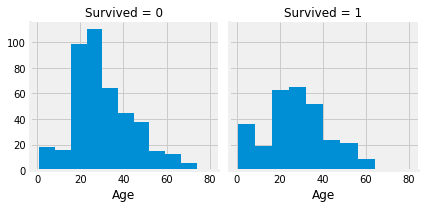

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=10)

Observations

*   Infants **(Age <=4)** had high survival rate.
*   Oldest passengers (Age = 80) survived.
*   Large number of **15-25 year olds** did not survive.
*   Most passengers are in 15-35 age range.



Decision
*   We should **consider Age** (our assumption classifying #2) in our model training.
*   Complete the Age feature for null values (completing #1).
*   We should **band age groups** (creating #3).

#### 5.1.1 Age band

In [71]:
bins3 = [0,10,20,30,40,50,65,85]
bins3_label = [str(x)+"세 이상" for x in bins3]
train['Age_group3'] = pd.cut(train['Age'], bins3, right=False, labels=bins3_label[:-1])
train[train['Age']>75]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group3
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,65세 이상


In [72]:
train[["Age_group3", "Survived"]].groupby(['Age_group3'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_group3,Survived
0,0세 이상,0.612903
3,30세 이상,0.437126
5,50세 이상,0.412698
1,10세 이상,0.401961
4,40세 이상,0.382022
2,20세 이상,0.350000
6,65세 이상,0.090909


### 5.1 객실등급과 생존여부에 따른 연령 분포

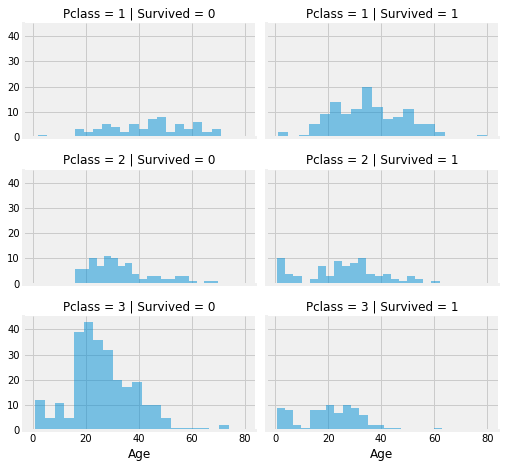

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### 5.2 성별과 등급에 따른 생존

In [ ]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

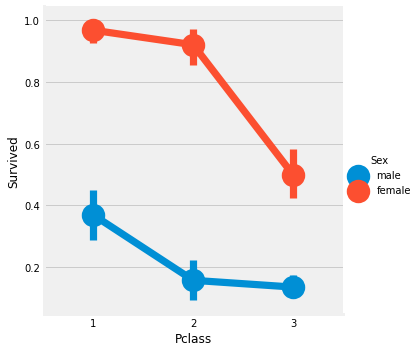

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex', data = train)
plt.show()

### 5.3 승선지와 객실등급에 따른 생존

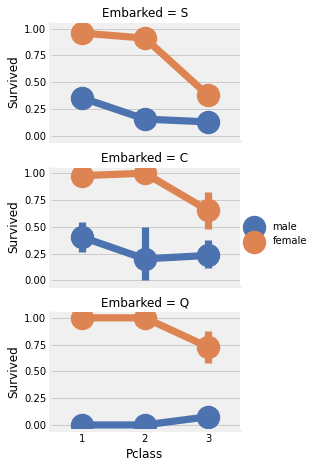

In [22]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

# (연습) 시각화

###4.0 Survived 비율

AxesSubplot(0.554545,0.125;0.395455x0.755)


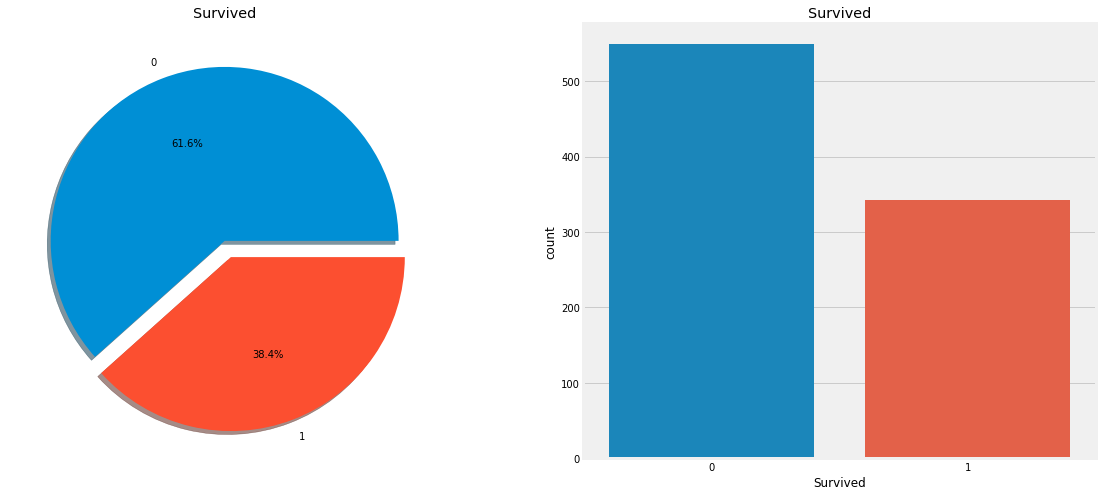

In [ ]:
# fig에 1행2열로 구성된 그래프 캔버스를 넣는다.
f,ax=plt.subplots(1,2,figsize=(18,8))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')

plt.show()

### 4.1 Sex * Survived

In [ ]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


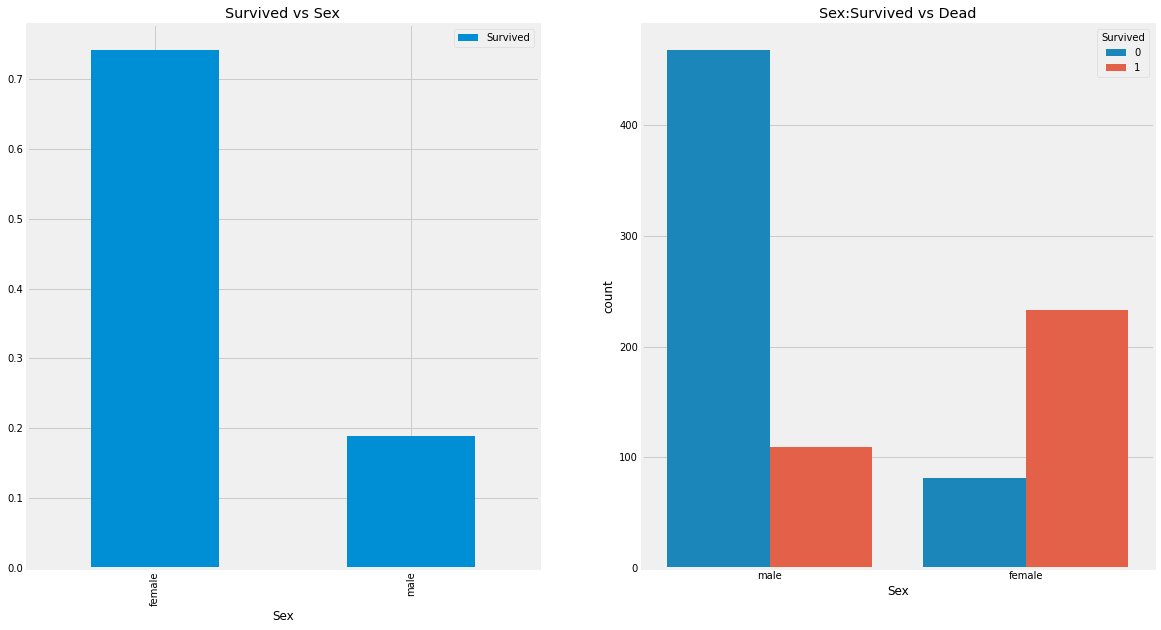

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,10))

train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data = train, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

### 4.2 Pclass * Survived

In [ ]:
pd.crosstab(train.Pclass, train.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


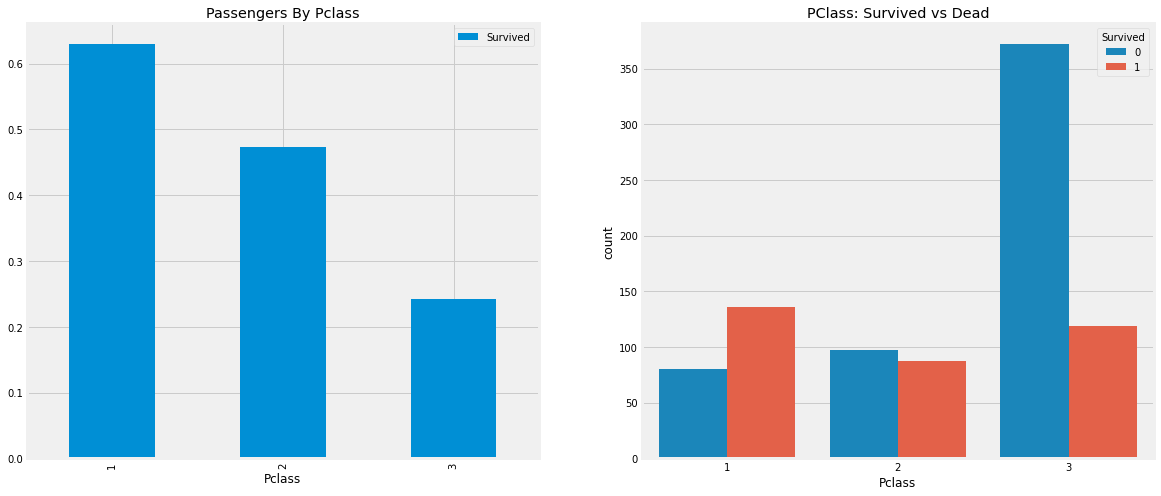

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))

train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Passengers By Pclass')

sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('PClass: Survived vs Dead')

plt.show()